In [11]:
import numpy as np 
from pyKriging import kriging
from keplergl import KeplerGl
import pandas as pd

In [27]:
df = pd.read_csv('C:\\Users\\BIGDATA_DEV\\Desktop\\実証実験事業\\Notebook\\kddidata\\220401900_kddi_base.csv')

In [43]:
X = df[['lat', 'lng']].values
y = df['param'].to_list()

In [ ]:
X

In [ ]:
y

In [46]:
k = kriging(X, y)
k.train()

In [50]:
k

In [52]:
print( k.predict([33.9838542, 132.7773438]))

0.3460045885161959


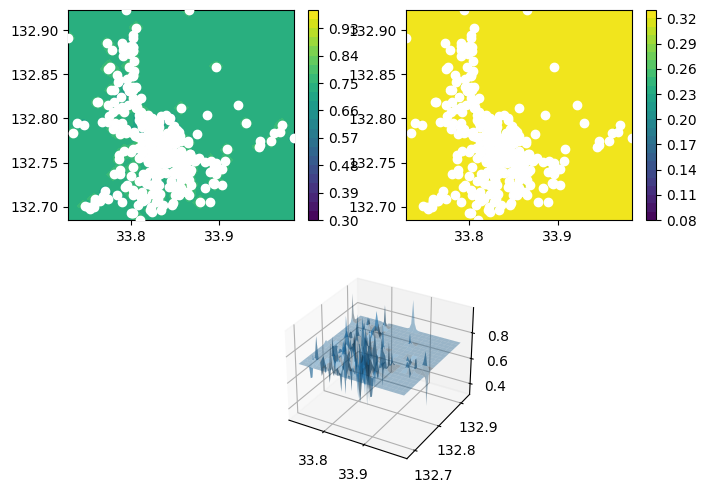

In [48]:
k.plot()

In [53]:
df2 = pd.read_csv('C:\\Users\\BIGDATA_DEV\\Desktop\\実証実験事業\\Notebook\\pointdata.csv')

In [74]:
lp = 0
res = 0
df2['result'] = 0
for row in df2.values:
    lp = lp + 1
    result = k.predict([row[0], row[1]])
    if res != result:
        res = result
        #print(res)
    df2.at[lp-1, 'result'] = result


In [75]:
df2

,latitude,longitude,result
0,34.073437,132.491406,0.736345
1,34.073437,132.492969,0.736345
2,34.073437,132.494531,0.736345
3,34.073437,132.496094,0.736345
4,34.073437,132.497656,0.736345
...,...,...,...
104155,33.686979,132.921094,0.736345
104156,33.686979,132.922656,0.736345
104157,33.686979,132.924219,0.736345
104158,33.686979,132.925781,0.736345


In [76]:
df2.to_csv('pointdata_all.csv')